# Part II - Insights from the Ford GoBike System Data: Exploring User Behavior
## by Farha Dahman

## Investigation Overview

> The goal of this investigation is to analyze the Ford GoBike System data to uncover key insights about user behavior, trip durations, and demographic trends. The dataset provides detailed information about bike-sharing trips, including trip durations, user types, and demographic attributes such as gender and age.

> This exploration aims to answer specific questions about how trip characteristics vary across different user groups and what factors influence trip durations and usage patterns. These insights can help inform operational decisions and improve the overall user experience of the bike-sharing system.

#### Key Insights:
- Trip Duration and User Type: Customers (casual users) tend to take longer trips compared to Subscribers (regular users), likely due to Subscribers using the system more for commuting purposes.
- Gender Trends: Male users make up the majority of trips, but trip durations vary significantly among genders, with female customers having slightly longer trips on average.
- Age and Trip Duration: Younger users (20–40 years old) dominate the usage of the bike-sharing system, while older users show more variability in trip durations.
- Bike Share Participation: Users who participate in the "Bike Share for All" program tend to have shorter trip durations, possibly due to specific program goals or regular usage patterns.


## Dataset Overview and Executive Summary

> The **Ford GoBike System dataset** contains information about individual bike-sharing trips in the San Francisco Bay Area. It includes details such as trip duration, start and end times, user type (Subscriber or Customer), user demographics (gender and birth year), and program participation status.

#### Key Features of the Dataset:

- Trip Details: Includes `duration_sec`, `start_station`, `end_station`, `start_time`, and `end_time`.
- User Information: Includes `user_type`, `member_gender`, and `member_birth_year`.
- Additional Context: Includes `bike_share_for_all_trip` (indicates participation in the Bikeshare for All program).

#### Summary of findings:
1. The majority of users are subscribers who primarily make short trips for commuting.
2. On the other hand, customers tend to make longer trips, perhaps for leisure.
3. The gender distribution shows that males are the dominant group of users, but gender trends vary by user type and trip duration.
4. Age plays an important role in determining trip duration, with younger users showing more consistent behavior.
5. Bike Share for All subscribers tend to make shorter trips, reflecting their usage patterns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
dataset_path = "Datasets/201902-fordgobike-tripdata.csv"
data = pd.read_csv(dataset_path)
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902.0,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535.0,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905.0,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638.0,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898.0,Subscriber,1974.0,Male,Yes


## (Visualization 1) Distribution of Trip Durations

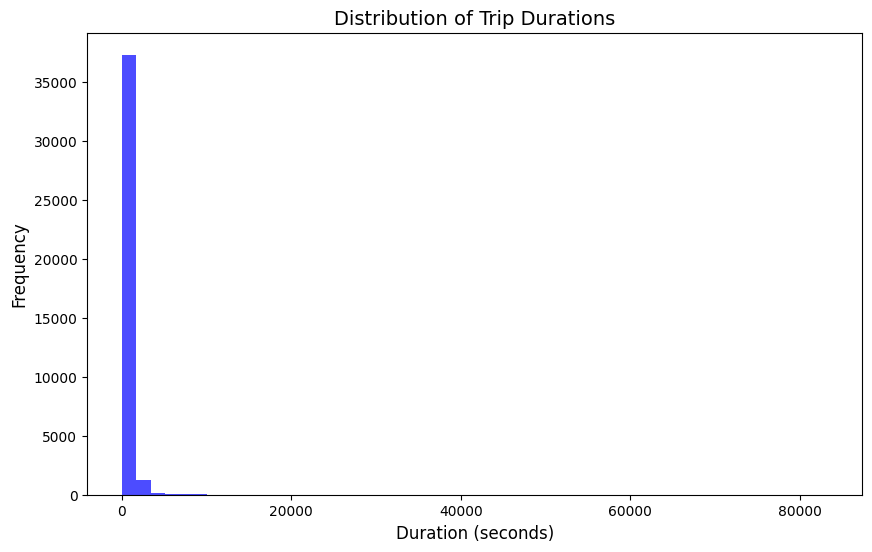

In [3]:
# Visualization 1: Distribution of Trip Durations
plt.figure(figsize=(10, 6))
plt.hist(data['duration_sec'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Trip Durations', fontsize=14)
plt.xlabel('Duration (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### Comment: 
**This histogram displays the distribution of trip durations in the dataset. The majority of trips are relatively short, with most falling under 2,000 seconds, approximately 33 minutes. The distribution is highly right-skewed, indicating that while most trips are short, there are a few trips with significantly longer durations. This visualization helps us understand the overall usage patterns and highlights the skewed nature of trip lengths.**

**Key observations:**

- The majority of trips have durations under 2,000 seconds (approximately 33 minutes), as indicated by the sharp peak near the left side of the plot.
- The distribution is highly right-skewed, with a few trips extending to much longer durations (up to 80,000 seconds). However, these long-duration trips are relatively rare.
- This visualization helps to highlight the typical trip lengths taken by users and reveals that most trips are short, likely used for commuting or quick errands.

## (Visualization 2) Trip Duration by Gender and User Type

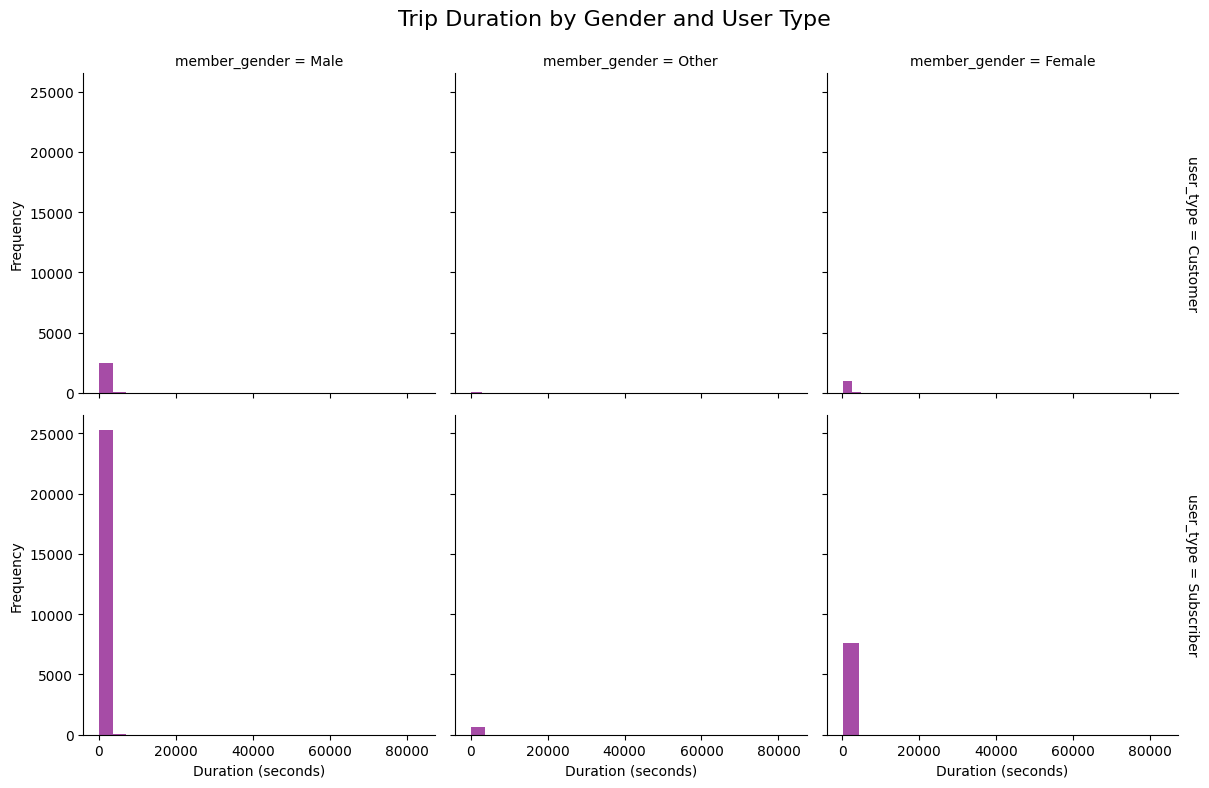

In [4]:
# Visualization 2: Trip Duration by Gender and User Type
facet = sns.FacetGrid(data, col='member_gender', row='user_type', margin_titles=True, height=4)
facet.map(plt.hist, 'duration_sec', bins=20, color='purple', alpha=0.7)
facet.set_axis_labels('Duration (seconds)', 'Frequency')
facet.fig.subplots_adjust(top=0.9)
facet.fig.suptitle('Trip Duration by Gender and User Type', fontsize=16)
plt.show()

### Comment: 
This facet grid histogram shows the distribution of trip durations across different gender groups and user types (Subscribers vs. Customers). The visualization reveals that:

- Customers tend to have longer trip durations across all gender groups.
- Subscribers generally have shorter, more consistent trip durations.
- Males account for the majority of trips in both user types, with females and others making up a smaller portion of the user base. This visualization emphasizes the differences in trip behaviors between user types and gender groups.

## (Visualization 3) User Type and Gender Distribution

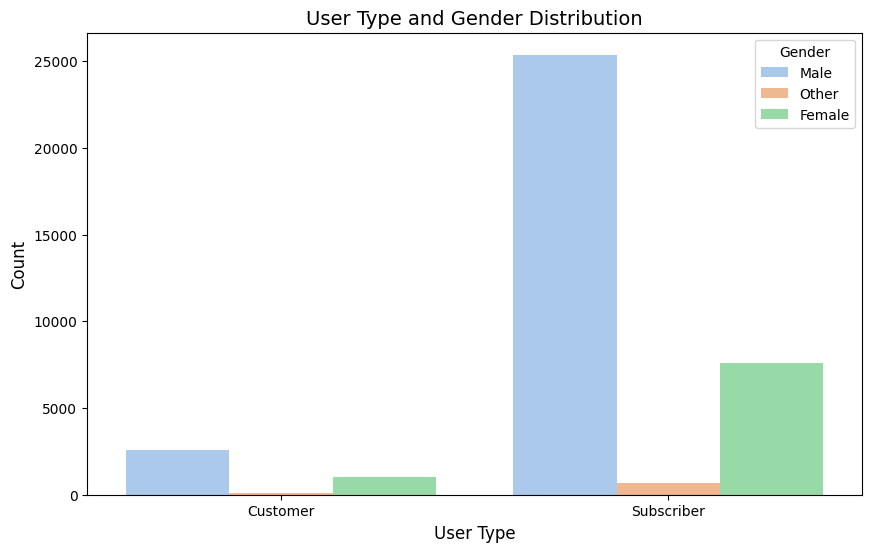

In [6]:
# Visualization 2: User Type and Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='user_type', hue='member_gender', palette='pastel')
plt.title('User Type and Gender Distribution', fontsize=14)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender')
plt.show()

### Comment:
This count plot visualizes the distribution of user types (Subscribers and Customers) split by gender. It highlights that:

- Males dominate the user base in both Subscribers and Customers.
- Females are the second largest group, followed by users categorized as "Other."
- Subscribers far outnumber Customers in all gender categories. This visualization demonstrates the demographics of the bike-sharing system's user base and the difference in user type popularity.